In [1]:
## WordCloud

In [5]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import os
import glob
import sys
!conda install --yes --prefix {sys.prefix} wordcloud

Solving environment: ...working... done

# All requested packages already installed.



In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#os.chdir("../Data/xrp")


extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "combined_xrp_data.csv", index=False, encoding='utf-8-sig')     
df = pd.read_csv("combined_xrp_data.csv")



In [21]:
df.tail()

,id,conversation_id,created_at,date,time,tweet,hashtags
261269,1447094557468938245,1447094557468938245,2021-10-10 00:00:02 Pacific Daylight Time,2021-10-10,00:00:02,🔄 Prices update in $USD | Last 1 hour $XRP 🟢 ...,[]
261270,1447094553945591813,1447094553945591813,2021-10-10 00:00:02 Pacific Daylight Time,2021-10-10,00:00:02,まるオススメ仮想通貨の現在価格は $ADA :253.9円(+0.19%) $COTI :6...,['仮想通貨']
261271,1447094554587447298,1447094553190846464,2021-10-10 00:00:02 Pacific Daylight Time,2021-10-10,00:00:02,@status_crypto #HourlyCryptoStatus #4 #usdt $...,"['hourlycryptostatus', 'usdt', 'bnb', 'xrp']"
261272,1447094552343498755,1447094552343498755,2021-10-10 00:00:01 Pacific Daylight Time,2021-10-10,00:00:01,https://t.co/dIubJoO1df 3:00 EDT $USD #BTC ⬇...,"['btc', 'ltc', 'bnb', 'trx', 'xlm', 'eth', 'xr..."
261273,1447094546169569286,1447094546169569286,2021-10-10 00:00:00 Pacific Daylight Time,2021-10-10,00:00:00,If this pattern plays out then the price move ...,"['etn', 'electroneum', 'crypto', 'fintech', 'b..."


In [22]:
print("There are {} observations and {} features in this data set.\n".format(df.shape[0],df.shape[1]))

There are 261274 observations and 7 features in this data set.



In [20]:
?WordCloud

In [23]:
text = df.hashtags
readtext = str(text)


In [24]:
wordcloud = WordCloud().generate(readtext)

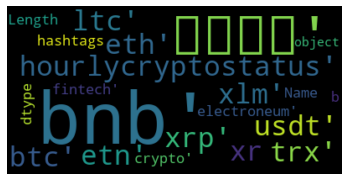

In [25]:
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

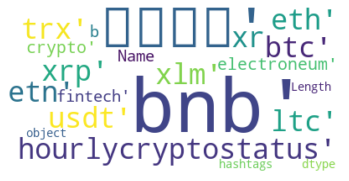

In [26]:
#lower max_font_size, change the max number of words and lighten the background

wordcloud = WordCloud(background_color = "white").generate(readtext)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show

In [27]:
stopwords = set(STOPWORDS)
stopwords.update(["name", "length", "dtype", "object", "hashtags", "axs", "airdrops", "airdrop", "giveawayinspector"])

<function matplotlib.pyplot.show(close=None, block=None)>

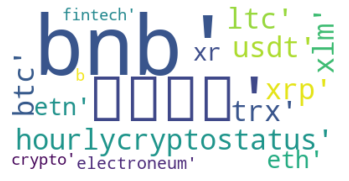

In [28]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size= 100, max_words= 50, background_color="white").generate(readtext)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show

In [30]:
xrp_image= np.array(Image.open("xrp.png"))
xrp_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [31]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    

In [32]:
transformed_xrp_image = np.ndarray((xrp_image.shape[0], xrp_image.shape[1]), np.int32)
for i in range (len(xrp_image)):
    transformed_xrp_image[i] = list(map(transform_format, xrp_image[i]))

In [33]:
transformed_xrp_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

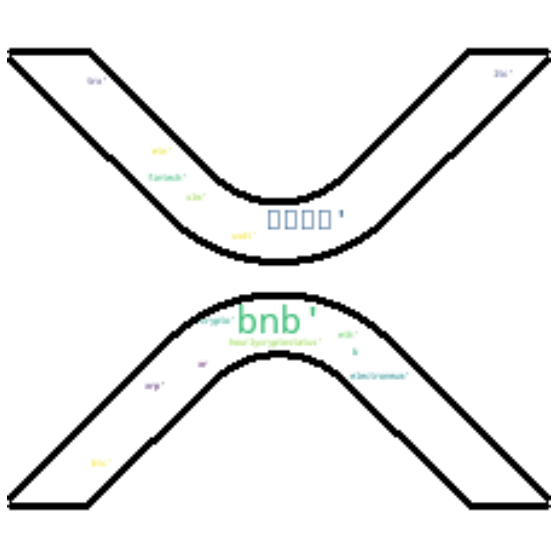

In [36]:
wc=WordCloud(background_color= "white", mask= transformed_xrp_image, stopwords=stopwords, contour_width = 3, contour_color ='black')
wc.generate(readtext)
wc.to_file("xrp.png")
plt.figure(figsize= [10,10])
plt.imshow(wc, interpolation= 'bilinear')
plt.axis("off")
plt.show()

In [19]:
retval = os.getcwd()
print(retval)

C:\Users\liuma\Project_1\Data\xrp
